## Face Detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg',0)
solvay = cv2.imread('DATA/solvay_conference.jpg',0)

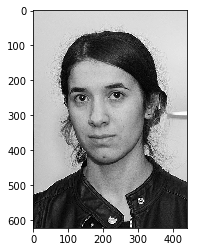

In [3]:
plt.imshow(nadia,cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml') # Load the cascade algorithm for face detection

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) # Detect faces in the image
    
    for (x,y,w,h) in face_rects: # Draw rectangles around the faces
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

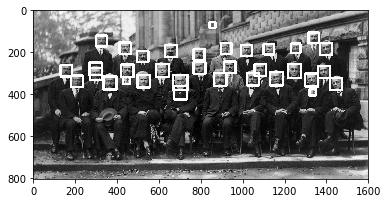

In [8]:
result = detect_face(solvay)
plt.imshow(result,cmap='gray')

In [12]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.1, minNeighbors=5) # Detect faces in the image
    
    for (x,y,w,h) in face_rects: # Draw rectangles around the faces
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

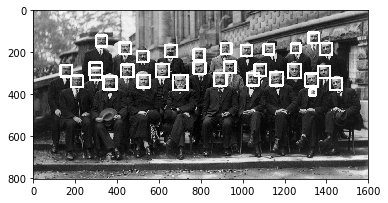

In [13]:
result = adj_detect_face(solvay)
plt.imshow(result,cmap='gray')

In [14]:
eye_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml') # Load the cascade algorithm for eye detection

In [17]:
def detect_eyes(img):
    face_img = img.copy()
    eyes_rects = eye_cascade.detectMultiScale(face_img) # Detect faces in the image
    
    for (x,y,w,h) in eyes_rects: # Draw rectangles around the faces
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        
    return face_img

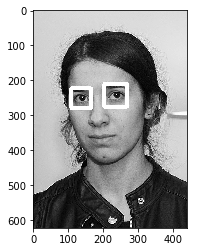

In [18]:
result = detect_eyes(nadia)
plt.imshow(result,cmap='gray')

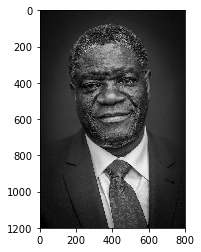

In [19]:
result = detect_eyes(denis)
plt.imshow(result,cmap='gray') #eyes arent picked up due to the whites of his eyes not being picked up

In [20]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    frame = detect_face(frame)
    cv2.imshow('Video Face Detection', frame)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()